In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# Read the csv file into a pandas DataFrame

ACS = pd.read_csv('CensusACSData.2.csv', encoding="latin1")
ACS.head()
ACS.dtypes
ACS["CrimeRate"]=pd.to_numeric(ACS["CrimeRate"])
ACS["PopulationDensity(P/sqMi)"]=pd.to_numeric(ACS["PopulationDensity(P/sqMi)"])
ACS["Poverty%2018"]=pd.to_numeric(ACS["Poverty%2018"])
ACS.dtypes

State_name                    object
 county_name                  object
CrimeRate                      int64
PopulationDensity(P/sqMi)    float64
Median_Age_ACS_14_18         float64
Poverty%2018                 float64
dtype: object

In [27]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = ACS[['Median_Age_ACS_14_18', 'PopulationDensity(P/sqMi)', 'Poverty%2018']]
y = ACS["CrimeRate"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION


(2916, 3) (2916, 1)


In [28]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [36]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [49]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

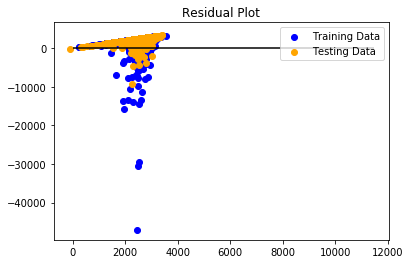

In [54]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [55]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 587873.5199336895, R2: 0.1774833543523303


In [52]:
#print(model.predict(X_test_scaled))
print((y_test))

[[   20]
 [   96]
 [    8]
 [   14]
 [   38]
 [ 1031]
 [    7]
 [  361]
 [    5]
 [    6]
 [   57]
 [   74]
 [  139]
 [  118]
 [    3]
 [  757]
 [    0]
 [    7]
 [  255]
 [    4]
 [   32]
 [  142]
 [    0]
 [   22]
 [    0]
 [   29]
 [  581]
 [   43]
 [   26]
 [   17]
 [    7]
 [  204]
 [  322]
 [    9]
 [    5]
 [    5]
 [   61]
 [   76]
 [   33]
 [   64]
 [    9]
 [   12]
 [ 1689]
 [    9]
 [  485]
 [    0]
 [   67]
 [  138]
 [  432]
 [  215]
 [   16]
 [  995]
 [ 4412]
 [   88]
 [   14]
 [  106]
 [  375]
 [   42]
 [  254]
 [  134]
 [    1]
 [  171]
 [    3]
 [  235]
 [  146]
 [  234]
 [   10]
 [  253]
 [   23]
 [   73]
 [  103]
 [   44]
 [  331]
 [    0]
 [   52]
 [  321]
 [  585]
 [  830]
 [    0]
 [    4]
 [    5]
 [    1]
 [   11]
 [   39]
 [   69]
 [   27]
 [   37]
 [   42]
 [   49]
 [  306]
 [   98]
 [   65]
 [  191]
 [  150]
 [  259]
 [   23]
 [   52]
 [   90]
 [    6]
 [    0]
 [   93]
 [   14]
 [  254]
 [   22]
 [    0]
 [   33]
 [   13]
 [   26]
 [    6]
 [   14]
 [   10]
 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


In [56]:
from scipy import stats

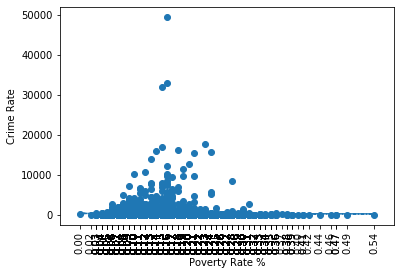

In [68]:
# Repeat plotting scatter and linear model for year versus murder rate

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress((ACS.iloc[:,5],ACS.iloc[:,3])
)
m_fit = m_slope * ACS.iloc[:,5] + m_int
plt.scatter(ACS.iloc[:,5],ACS.iloc[:,2])
plt.plot(ACS.iloc[:,5],m_fit,"--")
plt.xticks(ACS.iloc[:,5], rotation=90)
plt.xlabel('Poverty Rate %')
plt.ylabel('Crime Rate')
plt.show()

In [67]:
stats.pearsonr(ACS.iloc[:,5],ACS.iloc[:,2])

(0.007360096523960063, 0.6911608565290082)